### Notes 
- Xeno Canto data is at 44.1kHz to 48kHz

In [113]:
import glob
import os
import numpy as np
import pandas as pd
import sounddevice as sd
import pylab as pl
import random

from scipy.io import wavfile
import matplotlib.pyplot as plt
from python_speech_features import mfcc
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from adjustText import adjust_text
from collections import Counter
from scipy.io.wavfile import write
from sklearn.cluster import AgglomerativeClustering

from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures

import librosa
from pydub import AudioSegment
import soundfile as sf
import tempfile
from pydub.utils import which
from scipy.io.wavfile import write


AudioSegment.converter = which("ffmpeg")

%matplotlib inline

In [126]:
# Returns all clip indexes within a cluster
def get_clip_indexes(cluster_label, clusters):
    clips_i = []
    for i in range(len(clusters)):
        if clusters[i] == cluster_label:
            clips_i.append(i)
    return clips_i

# Plays a random clip in a given cluster
def play_random_clip_in_cluster(index, clusters, option='cluster'):
    assert(option == 'cluster' or option == 'clip')
    if option == 'clip':
        index = find_cluster(index, clusters) # Get cluster index
    
    clips = get_clip_indexes(index, clusters)
    clip_i = clips[random.randint(0, len(clips) - 1)]
    print('Playing clip index %d ' % clip_i)
    play_clip(clip_i)
        
# Returns the cluster label that a clip belongs to
def find_cluster(clip_index, clusters):
    return clusters[clip_index]

# Plays an audio clip given the clip index
def play_clip(clip_index):
    samples = shorter_clips[clip_index]
    sd.play(samples, samplerate)

# Flattens a given list
def list_flatten(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

# Saves clip as a wav file
def save_clip(filename, wav_array):
    assert('.' not in filename)
    write(filename + '.wav', samplerate, wav_array)
    
# Saves all clips to a directory
def save_clips_to_dir(shorter_clips, dirname):
    for i, clip in enumerate(shorter_clips):
        save_clip(dirname + '/%d' % i, clip) 
        
# # TO DO: Might need to delete later
    
def load_audio(filepath, sr=None, mono=True, dtype='float32'): 
    # Need to change sample rate to 44.1kHz if using audiomoths
    # one of the inputs: subdir=None
    """
    Part of code from 
    https://github.com/bill317996/Audio-to-midi/blob/master/cfp.py
    """
    
    if '.mp3' in filepath: 
        x, fs = sf.read(filepath)
        path = os.path.splitext(filepath)[0] + '.wav'
        write(path, fs, x)

    else:
        x, fs = sf.read(filepath)
        
    if mono and len(x.shape)>1: 
        x = np.mean(x, axis = 1) 
    if sr:
        x = scipy.signal.resample_poly(x, sr, fs)
        fs = sr 
    x = x.astype(dtype)
    return x, fs

In [131]:
# Testing load_audio function

dir_path = '/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/'
file_path = dir_path + 'XC431125 - Rufous Twistwing - Cnipodectes superrufus.mp3'
x, fs = load_audio(file_path, sr=None, mono=True, dtype='float32')

# /Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/wav/XC431125 - Rufous Twistwing - Cnipodectes superrufus.wav

# manually mp3 reading to wav
# check if arrays are equal
# array1 == 0

[-6.1035156e-05 -1.5258789e-05  3.0517578e-05 ...  1.5258789e-05
 -3.0517578e-05  3.0517578e-05]
48000


In [ ]:
# Graph to compare 
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x)

print(x)
print(fs)

check_dir_path = '/Users/yoo-jin/Desktop/XC431125 - Rufous Twistwing - Cnipodectes superrufus.wav'
x_test, fs_test = sf.read(check_dir_path)

ax2.plot(x_test)

## Load Audio Data

In [ ]:
from audio2numpy import open_audio

dir_path = '/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/'
listing = os.listdir(dir_path)

for f in listing: 
#     print(f)
    signal, sampling_rate = open_audio(dir_path + f)
#     print(signal)
#     print(sampling_rate)

In [69]:
dir_path = '/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/'
listing = os.listdir(dir_path)
wav_data = []
samplerate = None

# sample rate differs for each file 

for f in listing: 
    print(f)
    try: 
        sound, rate = load_audio(dir_path + f)
        samplerate = rate
        if wav_list == []:
            wav_list = sound
        else:
            wav_data = np.concatenate((wav_list, wav_data))
    except Exception as e: 
        print('(failed) ' + f)
        print('\t' + str(e))
        pass
    
print(wav_list) 
print(sampling_list)

XC146509 - Three-striped Flycatcher - Conopias trivirgatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp23gob5_u
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146524 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp69pj_u2h
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146525 - Olive Oropendola - Psarocolius bifasciatus yuracares.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpjk1d33co
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146526 - Mato Grosso Swift - Chaetura viridipennis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmplak9ietu
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.10351562e-05
  9.15527344e-05  0.00000000e+00]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
  9.1552734e-05  0.0000000e+00]
44100
XC146527 - Buff-throated Saltator - Saltator maximus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmjuabh06
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146528 - Buff-throated Saltator - Saltator maximus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqtuqemar
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146529 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp377ymgz6
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146530 - Tui Parakeet - Brotogeris sanctithomae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp7hp9isix
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146531 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmptrkfsm84
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146532 - Tui Parakeet - Brotogeris sanctithomae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4phobqn3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146533 - Eastern Wood Pewee - Contopus virens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwi4cmew8
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146534 - Greyish Saltator - Saltator coerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpf82_xr64
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146535 - Greyish Saltator - Saltator coerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfedrnwwa
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146536 - Spot-breasted Woodpecker - Colaptes punctigula.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp2w9ugfbl
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146538 - Blue-black Grassquit - Volatinia jacarina.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpakqkvet3
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -3.05175781e-05  0.00000000e+00]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00]
44100
XC146539 - Chestnut-bellied Seedeater - Sporophila castaneiventris.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfids1urd
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146540 - Blue-black Grassquit - Volatinia jacarina.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp53u84ptz
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.05175781e-05
 -4.57763672e-04  1.22070312e-04]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -4.5776367e-04  1.2207031e-04]
44100
XC146541 - Great Antshrike - Taraba major.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpb4s7jeaq
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146542 - Grey-breasted Crake - Laterallus exilis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9u4752u6
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146543 - Tropical Kingbird - Tyrannus melancholicus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmplad1_ft8
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146544 - Silver-beaked Tanager - Ramphocelus carbo.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmppx5ul9m1
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146545 - Rufous-browed Peppershrike - Cyclarhis gujanensis gujanensis_.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpsz8_vi5c
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146546 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqfbsc846
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146547 - Johannes's Tody-Tyrant - Hemitriccus iohannis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpk4ezf70d
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05175781e-05
 0.00000000e+00 0.00000000e+00]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00]
44100
XC146548 - Manu Antbird - Cercomacra manu.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpletqt303
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC146549 - Amazonian Antpitta - Hylopezus berlepschi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3jgw2p_y
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC188746 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphl5klddn
[-0.28942871 -0.46936035 -0.43307495 ...  0.18771362  0.18579102
  0.10980225]
48000
[-0.2894287  -0.46936035 -0.43307495 ...  0.18771362  0.18579102
  0.10980225]
48000
XC22019 - Blue-crowned Trogon - Trogon curucui.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpc6v0i2g9


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22035 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgys28204
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22072 - Sapphire-spangled Emerald - Amazilia lactea.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpvpel_2ii
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22082 - Channel-billed Toucan - Ramphastos vitellinus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9y0pn8fh
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22087 - Silky-tailed Nightjar - Antrostomus sericocaudatus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmprovldvhh
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22099 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5ca0vrnd
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22193 - Red-necked Woodpecker - Campephilus rubricollis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp0x_tsmmr
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22208 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpibn5xsff
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp2aj23m14
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22269 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwb0o_blc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22270 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphp3tpiwk
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22279 - Greyish Mourner - Rhytipterna simplex.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6npqxrji
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22404 - Black Antbird - Cercomacroides serva.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwo64w1q9
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22458 - White-eyed Antwren - Epinecrophylla leucophthalma.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpjew3or82
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22481 - Black-faced Antbird - Myrmoborus myotherinus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpjkgjnb47
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22503 - Southern Chestnut-tailed Antbird - Sciaphylax hemimelaena.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpun6jvsep
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22516 - Screaming Piha - Lipaugus vociferans.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8av_27mb
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC22533 - Blue-backed Manakin - Chiroxiphia pareola.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpsyws9z4b


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC23064 - Tawny-crowned Greenlet - Hylophilus ochraceiceps.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpn6p7_8u0
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC23101 - Slaty-capped Shrike-Vireo - Vireolanius leucotis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg2x19l8l
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC23400 - Red-billed Pied Tanager - Lamprospiza melanoleuca.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmr9e772u
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC23428 - White-winged Shrike-Tanager - Lanio versicolor.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5jzg0owt
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC23434 - White-winged Shrike-Tanager - Lanio versicolor.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpao08hxjd


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC23435 - Paradise Tanager - Tangara chilensis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp728epwj1
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC343100 - Russet-backed Oropendola - Psarocolius angustifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3o__tsrk
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 ...
 [-3.05175781e-05 -3.05175781e-05]
 [ 3.05175781e-05  3.05175781e-05]
 [ 3.05175781e-05  3.05175781e-05]]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  3.0517578e-05  3.0517578e-05]
48000
XC40219 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpeip5zn8z
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40220 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp2h3yi98p
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40221 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpxhega3s6
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40223 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp181mr6pm
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40224 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpo_m5_k87
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40226 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpo2l8g7iv
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40229 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbwwy97oy
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40307 - Fine-barred Piculet - Picumnus subtilis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1abn88se
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40309 - White-throated Jacamar - Brachygalba albogularis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6my4fnhe
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40310 - White-throated Jacamar - Brachygalba albogularis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpf72h796s
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40311 - White-throated Jacamar - Brachygalba albogularis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpv4v_k8t6
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 9.15527344e-05]
48000
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 9.1552734e-05]
48000
XC40312 - Chestnut-capped Puffbird - Bucco macrodactylus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfwphfs2d
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40313 - Goeldi's Antbird - Akletos goeldii.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp07fbssu7
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40314 - White-lined Antbird - Myrmoborus lophotes.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmr6bykea
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40315 - Slender-billed Kite - Helicolestes hamatus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmplo0vzqn3
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40316 - Bamboo Antshrike - Cymbilaimus sanctaemariae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3f5cge9c
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40317 - Black-capped Tinamou - Crypturellus atrocapillus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpimhsqqhl
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC40544 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqucfjpao
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC40545 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpyvuulr1u
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC418582 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbsl13dt_
[0.         0.         0.         ... 0.08703613 0.10098267 0.08908081]
48000
[0.         0.         0.         ... 0.08703613 0.10098267 0.08908081]
48000
XC431120 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4w58_7ns
[[-0.01278687 -0.01278687]
 [-0.01605225 -0.01605225]
 [-0.02532959 -0.02532959]
 ...
 [-0.00280762 -0.00335693]
 [-0.00787354 -0.00802612]
 [-0.00131226 -0.00091553]]
48000
[-0.01278687 -0.01605225 -0.02532959 ... -0.00308228 -0.00794983
 -0.00111389]
48000
XC431125 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpkbnv_bds
[[-6.10351562e-05 -6.10351562e-05]
 [ 0.00000000e+00 -3.05175781e-05]
 [ 3.05175781e-05  3.05175781e-05]
 ...
 [ 3.05175781e-05  0.00000000e+00]
 [-3.05175781e-05 -3.05175781e-05]
 [ 0.00000000e+00  6.10351562e-05]]
48000
[-6.1035156e-05 -1.5258789e-05  3.0517578e-05 ...  1.5258789e-05
 -3.0517578e-05  3.0517578e-05]
48000
XC431131 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpeddkrz4h
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 3.05175781e-05  0.00000000e+00]
 ...
 [-3.05175781e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.05175781e-05]]
48000
[ 0.0000000e+00  0.0000000e+00  1.5258789e-05 ... -1.5258789e-05
  0.0000000e+00  1.5258789e-05]
48000
XC47471 - Riparian Antbird - Cercomacroides fuscicauda.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3f658hzr
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00 -9.15527344e-05]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -9.1552734e-05]
48000
XC47472 - Black-throated Antbird - Myrmophylax atrothorax.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpa604l1dv


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47473 - Bluish-fronted Jacamar - Galbula cyanescens.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpy2j9xmkg
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47475 - Peruvian Recurvebill - Syndactyla ucayalae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpttsi6zj2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.15527344e-05
 -1.22070312e-04 -3.05175781e-05]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -3.0517578e-05]
48000
XC47476 - Peruvian Recurvebill - Syndactyla ucayalae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpz9b7xb2u
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47477 - Peruvian Recurvebill - Syndactyla ucayalae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpt65nj_un
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47478 - Purus Jacamar - Galbalcyrhynchus purusianus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpd92p7jkr
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47480 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1_ibngw7
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47481 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpz33rs9mu
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47482 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_ztwrb6r
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  0.00000000e+00  0.00000000e+00]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00]
48000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


XC47550 - Riparian Antbird - Cercomacroides fuscicauda.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpby9dnfw1
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.10351562e-05
 -3.05175781e-05 -3.05175781e-05]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05]
48000
XC47551 - Black-throated Antbird - Myrmophylax atrothorax.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1h4weu_x
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47552 - Black-throated Antbird - Myrmophylax atrothorax.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8g1otsdl


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47553 - Chestnut-crowned Foliage-gleaner - Automolus rufipileatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmprnemk_jj
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47554 - White-eyed Attila - Attila bolivianus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgjbwr10_
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.10351562e-05
  9.15527344e-05  9.15527344e-05]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
  9.1552734e-05  9.1552734e-05]
48000
XC47555 - Dusky-headed Parakeet - Aratinga weddellii.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4qvd5a1l
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47556 - Grey-lined Hawk - Buteo nitidus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp7g42gw5u
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47557 - Johannes's Tody-Tyrant - Hemitriccus iohannis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8uf65bhz
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.10351562e-05
 3.05175781e-05 2.13623047e-04]
48000
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 2.1362305e-04]
48000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


XC47558 - Long-billed Woodcreeper - Nasica longirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpnntu7anf
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47559 - Plumbeous Antbird - Myrmelastes hyperythrus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp61rkodui
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47560 - Rufous-breasted Piculet - Picumnus rufiventris.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpjtyl5w3e
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.10351562e-05
 1.52587891e-04 3.05175781e-05]
48000
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 1.5258789e-04
 3.0517578e-05]
48000
XC47561 - Rufous-breasted Piculet - Picumnus rufiventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp0q38ij_b
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.05175781e-05
 -3.05175781e-05  0.00000000e+00]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  0.0000000e+00]
48000
XC47562 - Rufous-breasted Piculet - Picumnus rufiventris.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5_mgmcbk
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
 -6.10351562e-05 -6.10351562e-05]
48000
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05]
48000
XC47563 - Sapphire-spangled Emerald - Amazilia lactea.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpx7h5e804
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47564 - Speckled Chachalaca - Ortalis guttata.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpn2mcelyv
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47565 - Spotted Tody-Flycatcher - Todirostrum maculatum.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpke7bt0nj
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47566 - Tui Parakeet - Brotogeris sanctithomae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpq9w8wzqj
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47567 - Tui Parakeet - Brotogeris sanctithomae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpv4z912zl
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfq34ayq6
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47569 - White-winged Becard - Pachyramphus polychopterus nigriventris.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpf0rqbpf8
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47570 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmppxj70sqh
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47673 - Greyish Saltator - Saltator coerulescens azarae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpb3gy36we
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47678 - Violaceous Jay - Cyanocorax violaceus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp7qdxbthp
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC47843 - Rufous-breasted Hermit - Glaucis hirsutus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8m0tgn3z
[0. 0. 0. ... 0. 0. 0.]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496773 - White-lined Antbird - Myrmoborus lophotes.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfovfo3f6
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496780 - Chestnut-crowned Foliage-gleaner - Automolus rufipileatus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp61ylc_qi
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496788 - Great Jacamar - Jacamerops aureus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfqp40sw5
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496789 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg9ovy3kg
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496790 - Great Jacamar - Jacamerops aureus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpygegrn3b


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496791 - Riparian Antbird - Cercomacroides fuscicauda.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3fkfc5u8
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496793 - Rufous-headed Woodpecker - Celeus spectabilis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpz110o4iq


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496922 - Slate-colored Grosbeak - Saltator grossus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8t5lod0k
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC496967 - Moustached Wren - Pheugopedius genibarbis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzdg_tmga
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


XC497062 - Bright-rumped Attila - Attila spadiceus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgy3v5dbm
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC497294 - Peruvian Recurvebill - Syndactyla ucayalae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp0ry3m3ru
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC497312 - Lemon-throated Barbet - Eubucco richardsoni.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpji1l4nmn
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000
[0. 0. 0. ... 0. 0. 0.]
48000
XC91306 - Mato Grosso Swift - Chaetura viridipennis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpirrkai61
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91316 - Tropical Kingbird - Tyrannus melancholicus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwmwjab2m
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91317 - Mouse-colored Tyrannulet - Phaeomyias murina wagae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpehpwc4mx
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91318 - Rusty-fronted Tody-Flycatcher - Poecilotriccus latirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpw6q8k_od
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


XC91319 - Rusty-margined Flycatcher - Myiozetetes cayanensis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpi6qirfiy
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91320 - Paint-billed Crake - Neocrex erythrops.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpuybsf_xa
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91321 - Paint-billed Crake - Neocrex erythrops.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpsxj7kos0
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91322 - Paint-billed Crake - Neocrex erythrops.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpumhy8w3s
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91323 - White-eyed Parakeet - Psittacara leucophthalmus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpa7jd01gp
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91324 - Stripe-chested Antwren - Myrmotherula longicauda.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpt02zne_e
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91325 - Southern Mealy Amazon - Amazona farinosa.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphvv5ayr7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91326 - Spot-breasted Woodpecker - Colaptes punctigula.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpa43ynldu
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05175781e-05
 3.05175781e-05 3.05175781e-05]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05]
44100
XC91327 - Chestnut-bellied Seed Finch - Oryzoborus angolensis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpx93mrgx1
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
 -9.15527344e-05 -2.74658203e-04]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -9.1552734e-05 -2.7465820e-04]
44100
XC91328 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9yln9xdr
[ 0.          0.          0.         ...  0.00012207 -0.00045776
 -0.00012207]
44100
[ 0.          0.          0.         ...  0.00012207 -0.00045776
 -0.00012207]
44100
XC91329 - Yellow-tufted Woodpecker - Melanerpes cruentatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcoiifxn3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91330 - Sunbittern - Eurypyga helias helias.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1yj47sf4
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91331 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_6abu770
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91332 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqnpon45d
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.05175781e-05
 -1.22070312e-04 -1.22070312e-04]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -1.2207031e-04 -1.2207031e-04]
44100
XC91333 - Rufous-capped Nunlet - Nonnula ruficapilla.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpm72aa23k
[ 0.          0.          0.         ... -0.00033569  0.00012207
  0.00054932]
44100
[ 0.          0.          0.         ... -0.00033569  0.00012207
  0.00054932]
44100
XC91334 - Long-billed Starthroat - Heliomaster longirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4ly7n_8x
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
XC91335 - Yellow-cheeked Becard - Pachyramphus xanthogenys.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg3at170o
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91336 - Greyish Saltator - Saltator coerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmy2xoabo
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -3.05175781e-05  0.00000000e+00]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00]
44100
XC91337 - Paint-billed Crake - Neocrex erythrops.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmprkyfa4ij
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  0.00000000e+00  0.00000000e+00]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00]
44100
XC91338 - Double-collared Seedeater - Sporophila caerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpksg89bb1
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.71386719e-04
  9.15527344e-05 -5.49316406e-04]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.7138672e-04
  9.1552734e-05 -5.4931641e-04]
44100
XC91339 - Double-collared Seedeater - Sporophila caerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpo7mkurik
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91438 - Pale-rumped Swift - Chaetura egregia.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp88635hp2
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.15527344e-05
  6.10351562e-05  2.44140625e-04]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
  6.1035156e-05  2.4414062e-04]
44100
XC91439 - Black-tailed Tityra - Tityra cayana.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpakki8qe_
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91440 - Yellow-rumped Cacique - Cacicus cela.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp54kkrl8c
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91441 - Yellow-rumped Cacique - Cacicus cela.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpj362lx0g
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91442 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpne_kvkx6
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91443 - Eastern Wood Pewee - Contopus virens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpedb6dw9v
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91444 - Little Woodpecker - Veniliornis passerinus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpe0efkn4d
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91445 - Ihering's Antwren - Myrmotherula iheringi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1myjab7t
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91446 - Rusty-belted Tapaculo - Liosceles thoracicus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpxali76uq
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91447 - Rusty-belted Tapaculo - Liosceles thoracicus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpu0dncl4n
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91448 - Red-necked Woodpecker - Campephilus rubricollis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpby3lq6pg
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91449 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbt3lfoeq
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.05175781e-05
 -5.18798828e-04 -6.10351562e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -5.1879883e-04 -6.1035156e-05]
44100
XC91450 - Plum-throated Cotinga - Cotinga maynana.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_5drjzqk
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91451 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwop57aj1
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91452 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp79r2zwam
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91453 - Ihering's Antwren - Myrmotherula iheringi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9n4syycs
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91454 - Ihering's Antwren - Myrmotherula iheringi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzlo_aqmx
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.83105469e-04
  0.00000000e+00  6.10351562e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8310547e-04
  0.0000000e+00  6.1035156e-05]
44100
XC91455 - Ihering's Antwren - Myrmotherula iheringi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp0et925re
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.22070312e-04
 -3.05175781e-05  6.10351562e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -3.0517578e-05  6.1035156e-05]
44100
XC91456 - Ihering's Antwren - Myrmotherula iheringi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbm2zua57
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91457 - Black-capped Parakeet - Pyrrhura rupicola lowlands.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbd248w5r
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  3.05175781e-05  3.05175781e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  3.0517578e-05  3.0517578e-05]
44100
XC91458 - Humaita Antbird - Myrmelastes humaythae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpyutjnvn_
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91459 - Black-faced Antthrush - Formicarius analis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp36gw153n
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91460 - Black Hawk-Eagle - Spizaetus tyrannus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp7xf9fwvi
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91492 - Yellow Tyrannulet - Capsiempis flaveola flaveola_.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbzxms1n2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91493 - Yellow Tyrannulet - Capsiempis flaveola flaveola_.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg7wyqrcf
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91494 - Violaceous Jay - Cyanocorax violaceus (1).mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp50k5qljx
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91494 - Violaceous Jay - Cyanocorax violaceus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmput7vzwen
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4rkplnjz
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91496 - Fork-tailed Woodnymph - Thalurania furcata.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpk1dcohbd
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91498 - Sclater's Antwren - Myrmotherula sclateri.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8xu7atj8
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05175781e-05
 3.05175781e-05 0.00000000e+00]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00]
44100
XC91501 - Sclater's Antwren - Myrmotherula sclateri.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9f3gy5rd
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91502 - Olivaceous Flatbill - Rhynchocyclus olivaceus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqjmm0503
[ 0.          0.          0.         ... -0.00030518 -0.00021362
 -0.00018311]
44100
[ 0.          0.          0.         ... -0.00030518 -0.00021362
 -0.00018311]
44100
XC91503 - White-chinned Sapphire - Hylocharis cyanus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpk32gaa_b
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05175781e-05
 0.00000000e+00 3.05175781e-05]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05]
44100
XC91505 - White-bearded Hermit - Phaethornis hispidus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzq9_iqr0
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91507 - White-bearded Hermit - Phaethornis hispidus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpy0sx91cs
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91508 - White-bearded Hermit - Phaethornis hispidus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpxob78kd9
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -6.10351562e-05  6.10351562e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05  6.1035156e-05]
44100
XC91509 - Olivaceous Flatbill - Rhynchocyclus olivaceus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1mdqb44r
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  3.05175781e-05  3.05175781e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  3.0517578e-05  3.0517578e-05]
44100
XC91510 - Red-eyed Vireo - Vireo olivaceus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_a2uvz1f
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91511 - Sulphury Flycatcher - Tyrannopsis sulphurea.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpi7_z2gdd
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91512 - Sulphury Flycatcher - Tyrannopsis sulphurea.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp0silqiy4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91513 - Johannes's Tody-Tyrant - Hemitriccus iohannis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1xgftnz3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91514 - Tui Parakeet - Brotogeris sanctithomae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpioaqqvoh
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
 -6.10351562e-05 -9.15527344e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -9.1552734e-05]
44100
XC91515 - Plumbeous Kite - Ictinia plumbea.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmppo4uyssq
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91516 - Rufous-fronted Antthrush - Formicarius rufifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3znzno5v
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  0.00000000e+00  3.05175781e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  3.0517578e-05]
44100
XC91517 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpt_k2agd_
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.27246094e-04
 -9.15527344e-05  2.13623047e-04]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.2724609e-04
 -9.1552734e-05  2.1362305e-04]
44100
XC91518 - Flammulated Bamboo Tyrant - Hemitriccus flammulatus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp0joil2zm
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91519 - Rusty-fronted Tody-Flycatcher - Poecilotriccus latirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpvhgajxds
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91558 - Greyish Saltator - Saltator coerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgj5d1200
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91559 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphf_xjuho
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91561 - Yellow-crowned Amazon - Amazona ochrocephala.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgic28u5h
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91562 - Yellow-crowned Amazon - Amazona ochrocephala.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbqfkeko4
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91563 - Olive-faced Flatbill - Tolmomyias viridiceps.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpj18bexi5
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91564 - Slate-colored Seedeater - Sporophila schistacea.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpb1l2_amt
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91565 - Black-throated Antbird - Myrmophylax atrothorax.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpr6o4o9k2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91567 - Large-headed Flatbill - Ramphotrigon megacephalum.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzua8wpk1
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91568 - White-lined Antbird - Myrmoborus lophotes.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmph6cppj28
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91569 - Yellow Tyrannulet - Capsiempis flaveola flaveola_.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5htb13z3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91570 - Olive-sided Flycatcher - Contopus cooperi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpvmhaf9cl


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[ 0.          0.          0.         ...  0.         -0.00012207
  0.00045776]
44100
[ 0.          0.          0.         ...  0.         -0.00012207
  0.00045776]
44100
XC91571 - Crested Oropendola - Psarocolius decumanus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpkuq_on89
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -9.15527344e-05  0.00000000e+00]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -9.1552734e-05  0.0000000e+00]
44100
XC91572 - Bamboo Antshrike - Cymbilaimus sanctaemariae.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpl5yxm9zo
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91573 - Grey-crowned Flatbill - Tolmomyias poliocephalus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmplochp83x
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91574 - Black-tailed Tityra - Tityra cayana.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9s0d18pp
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


XC91575 - Barred Antshrike - Thamnophilus doliatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpdn0dvbap
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91576 - Grey-lined Hawk - Buteo nitidus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpuw5tk8x6
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91577 - Plumbeous Kite - Ictinia plumbea.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpodfrtx7q
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91584 - Tropical Gnatcatcher - Polioptila plumbea parvirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9q2uzd7v
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91586 - White-lined Tanager - Tachyphonus rufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwbb8tz68
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91588 - Black-capped Parakeet - Pyrrhura rupicola lowlands.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpdhyupukf
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91592 - Lined Seedeater - Sporophila lineola.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpl2hnqk1h
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00 -3.05175781e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05]
44100
XC91658 - Boat-billed Flycatcher - Megarynchus pitangua.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpp79x_itd
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.10351562e-05
 1.52587891e-04 1.22070312e-04]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 1.5258789e-04
 1.2207031e-04]
44100
XC91659 - Boat-billed Flycatcher - Megarynchus pitangua.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbjaua9_5
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91660 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpdkgic03c
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91661 - Olive Oropendola - Psarocolius bifasciatus yuracares.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp86xa7uk6
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91662 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpkr76905q
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91663 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpll8_jz8f
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91664 - Double-collared Seedeater - Sporophila caerulescens.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg2k__5jh
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91665 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp02osfjag
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
XC91666 - Black-and-white Tanager - Conothraupis speculigera.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpty8pmmd7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 3.05175781e-05 3.05175781e-05]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05]
44100
XC91668 - Black-and-white Tanager - Conothraupis speculigera.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpotgl626u
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
XC91669 - Cabanis's Spinetail - Synallaxis cabanisi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6e4mq5hy
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91671 - Cabanis's Spinetail - Synallaxis cabanisi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp1tcc3ko9
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.74658203e-04
 9.15527344e-05 2.44140625e-04]
44100
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7465820e-04 9.1552734e-05
 2.4414062e-04]
44100
XC91672 - Cabanis's Spinetail - Synallaxis cabanisi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpypt3yozo
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.15527344e-05
 -9.15527344e-05  0.00000000e+00]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.1552734e-05
 -9.1552734e-05  0.0000000e+00]
44100
XC91673 - Bananaquit - Coereba flaveola.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpj_w3z48w
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91674 - Plum-throated Cotinga - Cotinga maynana.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpk44vb92p
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91675 - Rufous-fronted Antthrush - Formicarius rufifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpkzfv50sp
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.15527344e-05
  3.05175781e-05 -3.05175781e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.1552734e-05
  3.0517578e-05 -3.0517578e-05]
44100
XC91676 - Sulphur-bellied Tyrant-Manakin - Neopelma sulphureiventer.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpy3q7h8kb
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91677 - Sulphur-bellied Tyrant-Manakin - Neopelma sulphureiventer.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpnozkooc2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91678 - Rufous-headed Woodpecker - Celeus spectabilis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqcq6x2y4
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91679 - Rufous-headed Woodpecker - Celeus spectabilis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg73y5575
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91680 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpni1bi84z
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91681 - Scarlet Tanager - Piranga olivacea.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpvaown33u
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91682 - Streaked Flycatcher - Myiodynastes maculatus solitarius.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5zbh3a2h
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91683 - Green Ibis - Mesembrinibis cayennensis.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6phadak3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91684 - Paint-billed Crake - Neocrex erythrops.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqbf4q4_0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91685 - Rufous-fronted Antthrush - Formicarius rufifrons.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpodwsgup2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91686 - Slate-colored Seedeater - Sporophila schistacea.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbx22g4ni
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.15527344e-05
 -3.35693359e-04  6.10351562e-05]
44100
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -3.3569336e-04  6.1035156e-05]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


XC91687 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgcaskdoi
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91688 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwy2fqcdq
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91689 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp890kdres
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91690 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpvar4rkm7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91691 - Rufous Twistwing - Cnipodectes superrufus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpug_hfyfm
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91692 - Yungas Tyrannulet - Phyllomyias weedeni.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9nryrmc8
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91693 - Yungas Tyrannulet - Phyllomyias weedeni.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6s9ohwul
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC91694 - Yungas Tyrannulet - Phyllomyias weedeni.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpc2dc42bg
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC97439 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmwzpzhcg
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC97441 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpad6taij0
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC97443 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpyw6i_ah2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
XC97444 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_2_d1bd3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
[]
[]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


In [77]:
# Erika's code: 
for file in glob.glob(dir_path + '*.mp3'):
    try: 
        data, rate = load_audio(dir_path + f)
        data = data.astype(int)
        
        samplerate = rate
        if wav_data == []:
            wav_data = data
        else:
            wav_data = np.concatenate((wav_data, data))
        print(file)
    except Exception as e:
        print('(failed) ' + file)
        print('\t' + str(e))
        pass

/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpv5ysnyh7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146509 - Three-striped Flycatcher - Conopias trivirgatus.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpirl_fgqd
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100
/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146524 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_kstm3ow
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146525 - Olive Oropendola - Psarocolius bifasciatus yuracares.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmptm6t2lk7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146526 - Mato Grosso Swift - Chaetura viridipennis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp70efwfik
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146527 - Buff-throated Saltator - Saltator maximus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9d429kq2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146528 - Buff-throated Saltator - Saltator maximus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpidh1c765
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146529 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpkhrvsaak
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146530 - Tui Parakeet - Brotogeris sanctithomae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpjoispd0f
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146531 - Black-faced Cotinga - Conioptilon mcilhennyi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmph43urjnn
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146532 - Tui Parakeet - Brotogeris sanctithomae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpng9qp5yc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146533 - Eastern Wood Pewee - Contopus virens.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpi92f9s9u
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146534 - Greyish Saltator - Saltator coerulescens.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6o67fc6x
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146535 - Greyish Saltator - Saltator coerulescens.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcqawjmky
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146536 - Spot-breasted Woodpecker - Colaptes punctigula.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpdiph0fs7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146538 - Blue-black Grassquit - Volatinia jacarina.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqj5g554z
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146539 - Chestnut-bellied Seedeater - Sporophila castaneiventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcww4fmny
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146540 - Blue-black Grassquit - Volatinia jacarina.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgvvxjx7g
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146541 - Great Antshrike - Taraba major.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcpzza1nt
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146542 - Grey-breasted Crake - Laterallus exilis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpih_pbjbj
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146543 - Tropical Kingbird - Tyrannus melancholicus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_tdv7dxi
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146544 - Silver-beaked Tanager - Ramphocelus carbo.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgydb_hdu
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146545 - Rufous-browed Peppershrike - Cyclarhis gujanensis gujanensis_.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9l4dq27c
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146546 - Chattering Gnatwren - Ramphocaenus sticturus obscurus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpt4l8l1sy
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146547 - Johannes's Tody-Tyrant - Hemitriccus iohannis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfpt8cunw
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146548 - Manu Antbird - Cercomacra manu.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpccpz_wrl
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC146549 - Amazonian Antpitta - Hylopezus berlepschi.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpm4pfr3mc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC188746 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzy_0jf6u
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22019 - Blue-crowned Trogon - Trogon curucui.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6ldm5a6s
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22035 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpif4j279_
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22072 - Sapphire-spangled Emerald - Amazilia lactea.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpze5kd_7b
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22082 - Channel-billed Toucan - Ramphastos vitellinus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9z_97f4f
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22087 - Silky-tailed Nightjar - Antrostomus sericocaudatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpsxuosglc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22099 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpe5wunppu
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22193 - Red-necked Woodpecker - Campephilus rubricollis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmppf2xle7i
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22208 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp85ccaarz
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcci8j4d1
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22269 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp2hfwlsqo
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22270 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmfy9r4hq
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22279 - Greyish Mourner - Rhytipterna simplex.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpe9xjsqvb
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22404 - Black Antbird - Cercomacroides serva.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpeesnb1n9
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22458 - White-eyed Antwren - Epinecrophylla leucophthalma.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzmx0_k1j
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22481 - Black-faced Antbird - Myrmoborus myotherinus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpe7plbri3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22503 - Southern Chestnut-tailed Antbird - Sciaphylax hemimelaena.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpm7b39_hs
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22516 - Screaming Piha - Lipaugus vociferans.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3mbpemhr
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22533 - Blue-backed Manakin - Chiroxiphia pareola.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpnjju3_7d
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC23064 - Tawny-crowned Greenlet - Hylophilus ochraceiceps.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmph2y9stxf
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC23101 - Slaty-capped Shrike-Vireo - Vireolanius leucotis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp3_sy6ibg
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC23400 - Red-billed Pied Tanager - Lamprospiza melanoleuca.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp7yfb0ls_
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC23428 - White-winged Shrike-Tanager - Lanio versicolor.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp2hjrt5wb
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC23434 - White-winged Shrike-Tanager - Lanio versicolor.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcmeafaij
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC23435 - Paradise Tanager - Tangara chilensis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpuupyl510
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC343100 - Russet-backed Oropendola - Psarocolius angustifrons.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqup27nuh
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40219 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_e8m3noo
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40220 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphzp_i7ur
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40221 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8uu5_wxw
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40223 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphlomuo0x
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40224 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4obyqwhe
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40226 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbvmaitxv
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40229 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpufxk3ey0
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40307 - Fine-barred Piculet - Picumnus subtilis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4td18nma
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40309 - White-throated Jacamar - Brachygalba albogularis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpr90x88is
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40310 - White-throated Jacamar - Brachygalba albogularis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzsqomaie
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40311 - White-throated Jacamar - Brachygalba albogularis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpyxdjfcyw
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40312 - Chestnut-capped Puffbird - Bucco macrodactylus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpyund3x8i
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40313 - Goeldi's Antbird - Akletos goeldii.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmporrcbwsc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40314 - White-lined Antbird - Myrmoborus lophotes.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpm_cfc4sv
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40315 - Slender-billed Kite - Helicolestes hamatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp7ec8jb4j
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40316 - Bamboo Antshrike - Cymbilaimus sanctaemariae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpudiqlf1l
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40317 - Black-capped Tinamou - Crypturellus atrocapillus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpd44hht6m
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40544 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmupqglp9
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC40545 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpd9oie72y
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC418582 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpoa_r23qt
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC431120 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmppod5m7p2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC431125 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8n5m0dlb
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC431131 - Acre Tody-Tyrant - Hemitriccus cohnhafti.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp51pub0xt
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47471 - Riparian Antbird - Cercomacroides fuscicauda.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpuoty0w8d
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47472 - Black-throated Antbird - Myrmophylax atrothorax.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6vyytj3n
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47473 - Bluish-fronted Jacamar - Galbula cyanescens.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpohno8wog
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47475 - Peruvian Recurvebill - Syndactyla ucayalae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp8a2s5enl
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47476 - Peruvian Recurvebill - Syndactyla ucayalae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp9luc5825
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47477 - Peruvian Recurvebill - Syndactyla ucayalae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpu_qt7o74
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47478 - Purus Jacamar - Galbalcyrhynchus purusianus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpxz234eej
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47480 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp66ua2nvm
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47481 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpo8r9xi0l
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47482 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpuounil1x
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47550 - Riparian Antbird - Cercomacroides fuscicauda.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpv9eml_ue
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47551 - Black-throated Antbird - Myrmophylax atrothorax.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp4dxpvttz
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47552 - Black-throated Antbird - Myrmophylax atrothorax.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpy0cz3vnt
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47553 - Chestnut-crowned Foliage-gleaner - Automolus rufipileatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmps4fiu723
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47554 - White-eyed Attila - Attila bolivianus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpxe_76w4a
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47555 - Dusky-headed Parakeet - Aratinga weddellii.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpg0enx7_0
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47556 - Grey-lined Hawk - Buteo nitidus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpphk1j7i3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47557 - Johannes's Tody-Tyrant - Hemitriccus iohannis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpauv8w_qa
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47558 - Long-billed Woodcreeper - Nasica longirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp6ufv419o
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47559 - Plumbeous Antbird - Myrmelastes hyperythrus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpj0n89zfc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47560 - Rufous-breasted Piculet - Picumnus rufiventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpolnwyblk
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47561 - Rufous-breasted Piculet - Picumnus rufiventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp272fdug7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47562 - Rufous-breasted Piculet - Picumnus rufiventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpr01n6nga
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47563 - Sapphire-spangled Emerald - Amazilia lactea.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpscuupeq2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47564 - Speckled Chachalaca - Ortalis guttata.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpjuyxb_lk
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47565 - Spotted Tody-Flycatcher - Todirostrum maculatum.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpklzr9_01
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47566 - Tui Parakeet - Brotogeris sanctithomae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpnrlralk5
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47567 - Tui Parakeet - Brotogeris sanctithomae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5k71g3ro
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmph54lit1w
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47569 - White-winged Becard - Pachyramphus polychopterus nigriventris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpb1j35nuc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47570 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp315pya_c
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47673 - Greyish Saltator - Saltator coerulescens azarae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfyhpb1b_
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47678 - Violaceous Jay - Cyanocorax violaceus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp_eu1c3uc
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC47843 - Rufous-breasted Hermit - Glaucis hirsutus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpfvpk7r4s
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496773 - White-lined Antbird - Myrmoborus lophotes.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpbrs_4hf3
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496780 - Chestnut-crowned Foliage-gleaner - Automolus rufipileatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzzt6qsah
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496788 - Great Jacamar - Jacamerops aureus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpj0gfky4f
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496789 - Yellow-breasted Warbling Antbird - Hypocnemis subflava.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp5skt3f45
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496790 - Great Jacamar - Jacamerops aureus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpdg39hcxa
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496791 - Riparian Antbird - Cercomacroides fuscicauda.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpgq0hgnc2
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496793 - Rufous-headed Woodpecker - Celeus spectabilis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp2g6awuhr
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496922 - Slate-colored Grosbeak - Saltator grossus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp__8vzbnn
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC496967 - Moustached Wren - Pheugopedius genibarbis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmy7bgq3s
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC497062 - Bright-rumped Attila - Attila spadiceus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpiu1cudwh
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC497294 - Peruvian Recurvebill - Syndactyla ucayalae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpe4gmlyxp
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC497312 - Lemon-throated Barbet - Eubucco richardsoni.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmphyk8lz47
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91306 - Mato Grosso Swift - Chaetura viridipennis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpo2pfsw_s
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91316 - Tropical Kingbird - Tyrannus melancholicus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpzqgsnak7
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91317 - Mouse-colored Tyrannulet - Phaeomyias murina wagae.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpvwsmuk0a
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91318 - Rusty-fronted Tody-Flycatcher - Poecilotriccus latirostris.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqv9vj7it
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91319 - Rusty-margined Flycatcher - Myiozetetes cayanensis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpcz7c3vpp
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91320 - Paint-billed Crake - Neocrex erythrops.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmporrvhoxx
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91321 - Paint-billed Crake - Neocrex erythrops.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpny93zoq8
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91322 - Paint-billed Crake - Neocrex erythrops.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpwv9hgbsi
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91323 - White-eyed Parakeet - Psittacara leucophthalmus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp42ge2vc9
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91324 - Stripe-chested Antwren - Myrmotherula longicauda.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqyi00m2i
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91325 - Southern Mealy Amazon - Amazona farinosa.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpmc43yzqo
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91326 - Spot-breasted Woodpecker - Colaptes punctigula.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpqhe8sm3h
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91327 - Chestnut-bellied Seed Finch - Oryzoborus angolensis.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmp61oznmlo
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91328 - Yellow-browed Sparrow - Ammodramus aurifrons.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpy69ikbzm
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91329 - Yellow-tufted Woodpecker - Melanerpes cruentatus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpanjpw06f
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91330 - Sunbittern - Eurypyga helias helias.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpupjy8dw_
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC91331 - Rufous Twistwing - Cnipodectes superrufus.mp3
/var/folders/dc/q1xzymts37d36_6hgjd9ngmc0000gn/T/tmpkm_l5n9m
[0. 0. 0. ... 0. 0. 0.]
44100
[0. 0. 0. ... 0. 0. 0.]
44100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


KeyboardInterrupt: 

In [ ]:
print('number of channels = %d' % wav_data.shape[1]) 
print(np.shape(wav_data))
print('number of channels = %d' % np.shape(wav_data)) 
print('sample rate = %d' % samplerate)
length = wav_data.shape[0] / samplerate
print('length = %.1fs' % length)

## Split Audio Data

In [33]:
# Get n-minute clips
def split_into_minutes(wav_data, samplerate, n=1):
    length_in_seconds = len(wav_data) / samplerate
    length_in_minutes = length_in_seconds / 60
    length_in_minutes = int(length_in_minutes / n)

    cut_wav_data = wav_data[:-((len(wav_data)) % length_in_minutes)]
    shorter_clips = np.split(cut_wav_data, length_in_minutes)
    print('%d %d-minute clips' % (len(shorter_clips), n))
    return shorter_clips

# Get n-second clips
def split_into_n_seconds(wav_data, samplerate, n=10):
    length_in_seconds = len(wav_data) / samplerate
    length_in_minutes = length_in_seconds / 60
    length_in_minutes = int(length_in_minutes)
    shorter_len = int(length_in_minutes / (1/(60/n)))
    
    second_clips = None
    
    try: 
        second_clips = np.split(wav_data, shorter_len)
        
    except:
        cut_wav_data = wav_data[:-((len(wav_data)) % shorter_len)]
        second_clips = np.split(cut_wav_data, shorter_len)

    print('%d %d-second clips' % (len(second_clips), n))
    return second_clips

In [8]:
#shorter_clips = split_into_minutes(wav_data, samplerate, 1)

shorter_clips = split_into_n_seconds(wav_data, samplerate, 10)


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

# Spectrograms

In [11]:
def plot_spectrogram(samplerate, shorter_clips, clip_index, separate_channels=False):
    left_channel = shorter_clips[clip_index][:, 0]
    right_channel = shorter_clips[clip_index][:, 1]
    
    plt.rcParams["figure.figsize"] = (100, 100)
    plt.rcParams.update({'font.size': 50})
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.subplot(211)
    if separate_channels:
        plt.title('Clip #%d (Left Channel)' % clip_index)
        plt.specgram(left_channel, Fs=samplerate)
        plt.subplot(212)
        plt.title('Clip #%d (Right Channel)' % clip_index)
        plt.specgram(right_channel, Fs=samplerate)
    else:
        plt.title('Clip #%d' % clip_index)
        both_channels = left_channel + right_channel
        plt.specgram(both_channels, Fs=samplerate)

    plt.show()
    
def plot_spectrogram_of_cluster(samplerate, shorter_clips, cluster_i, clusters, separate_channels=False):
    clip_indexes = get_clip_indexes(cluster_i, clusters)
    
    left_channel = shorter_clips[clip_indexes[0]][:, 0]
    right_channel = shorter_clips[clip_indexes[0]][:, 1]
    
    for i in range(1, len(clip_indexes)):
        left_channel = np.append(left_channel, shorter_clips[clip_indexes[i]][:, 0])
        right_channel = np.append(right_channel, shorter_clips[clip_indexes[i]][:, 1])
    
    plt.rcParams["figure.figsize"] = (100, 100)
    plt.rcParams.update({'font.size': 50})
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.subplot(211)
    if separate_channels:
        plt.title('Cluster #%d (Left Channel)' % cluster_i)
        plt.specgram(left_channel, Fs=samplerate)
        plt.subplot(212)
        plt.title('Cluster #%d (Right Channel)' % cluster_i)
        plt.specgram(right_channel, Fs=samplerate)
    else:
        plt.title('Cluster #%d' % cluster_i)
        both_channels = left_channel + right_channel
        plt.specgram(both_channels, Fs=samplerate)

    plt.show()

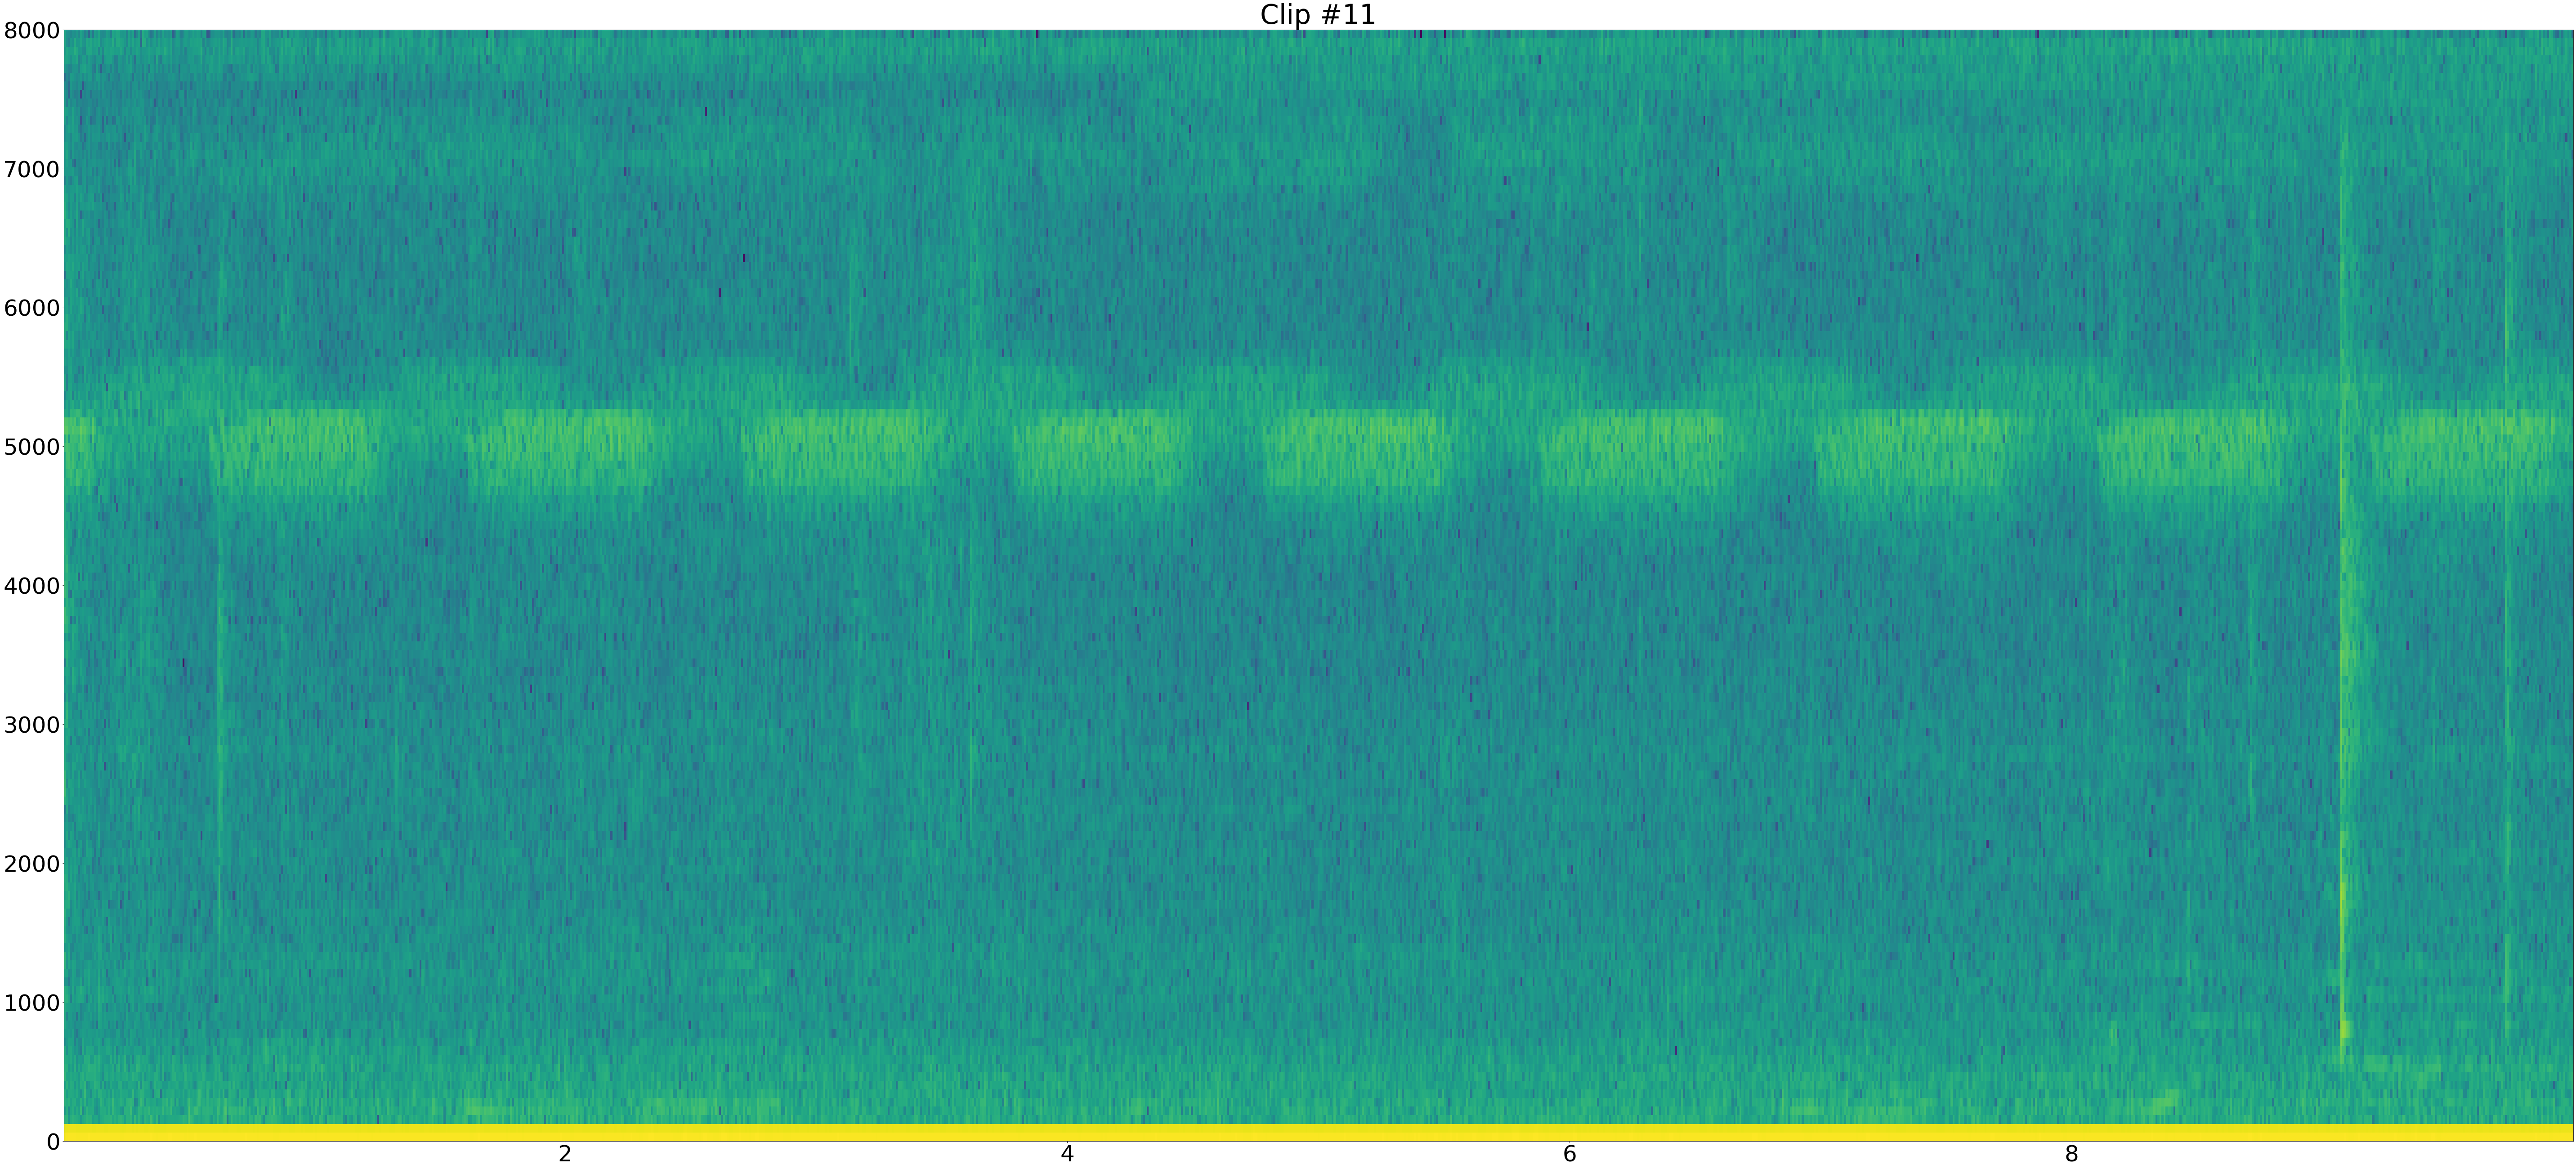

In [12]:
plot_spectrogram(samplerate, shorter_clips, 11)

# Feature Extraction

In [16]:
# TODO: Add a way to select and evaluate features

def extract_features(shorter_clips, mfcc_only=False, mono=False):
    feat_clips = []

    print('Extracting features for each of the %d audio clips' % len(shorter_clips))
    for clip in shorter_clips:
        if mono == False:
            clip = clip[:, 0] + clip[:, 1] # Merging left and right channels

        mfcc_feat=None
        if mfcc_only:
            mfcc_feat = mfcc(clip, samplerate).flatten()

        else:
            mfcc_feat = ShortTermFeatures.feature_extraction(clip, samplerate, 0.050*samplerate, 0.025*samplerate)
            print('')
            print(mfcc_feat[1])

        # Append the features
        if mfcc_only:
            feat_clips.append(mfcc_feat)
        else:
            feat_clips.append(list_flatten(mfcc_feat[0]))

    print('done')
    return feat_clips
    
# Set mfcc_only to True to shorten runtime
mfcc_clips = extract_features(shorter_clips, mfcc_only=True, mono=True)
#all_feat_clips = extract_features(shorter_clips)

Extracting features for each of the 5034 audio clips
done


# Clustering

In [17]:
dist = 1 - cosine_similarity(mfcc_clips)
mds = PCA(n_components=2, random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

X = pos

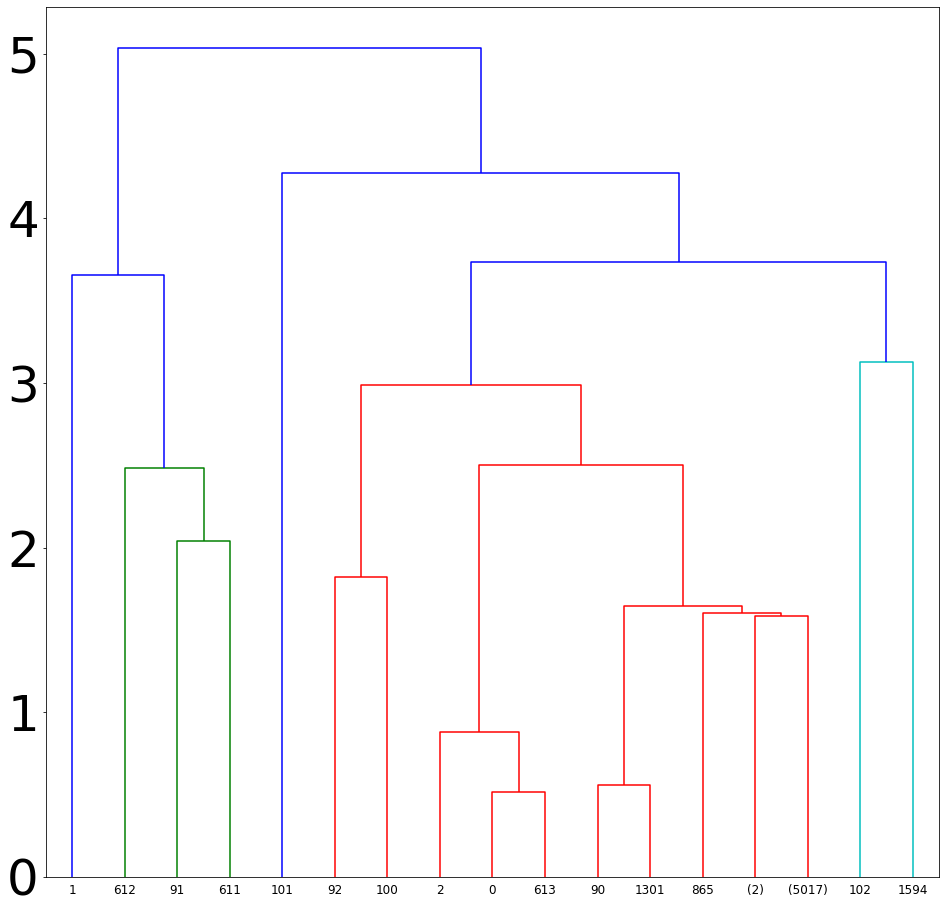

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(len(X))

plt.figure(figsize=(16, 16))
dendro = dendrogram(linked,
            p=7,
            orientation='top',
            #labels=labelList,
            truncate_mode='level',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [19]:
def cluster_plot(pos, title='', without_labels=False, width=20, height=20, savepath=''):
    plt.rc('font', size=15)
    
    xs, ys = pos[:, 0], pos[:, 1]
    
    labels = range(len(shorter_clips))

    # Data frame with TSNE data, the cluster numbers and titles
    cluster_df = pd.DataFrame(dict(x=xs, y=ys, clusters=clusters, labels=labels)) 

    fig, ax = plt.subplots(figsize=(width, height))
    ax.margins(0.05)
    ax.set_title(title)

    groups = cluster_df.groupby('clusters')
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, mec='none', label=name)
        ax.set_aspect('auto')
        ax.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
        ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')

    ax.legend(numpoints=1)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    #Add labels
    if not without_labels:
        texts = []
        for i in range(len(cluster_df)):
            texts.append(ax.text(cluster_df.loc[i, 'x'], cluster_df.loc[i, 'y'], cluster_df.loc[i,'labels'], size=10)) 

        #adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
    if savepath != '':
        plt.savefig(savepath, dpi=200, bbox_inches="tight")

    plt.show()

In [20]:
# Choose number of clusters
n_clusters = 43

# Fit clustering model
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit_predict(mfcc_clips)

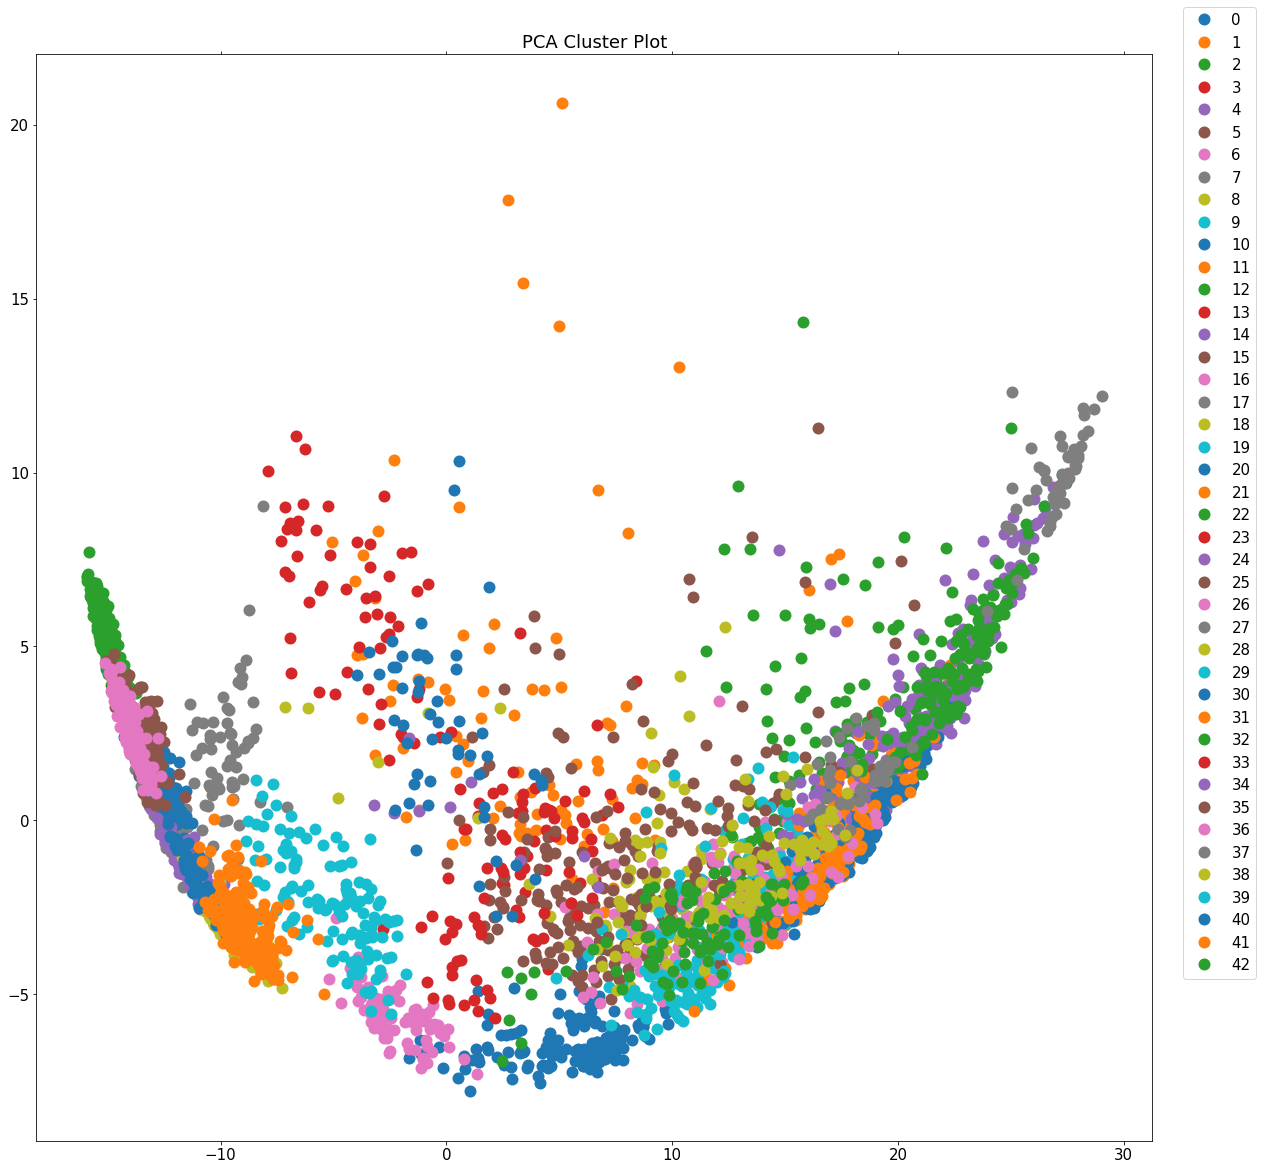

In [21]:
# Project the data onto 2D graph - 10 clusters
dist = 1 - cosine_similarity(mfcc_clips)
mds = PCA(n_components=2, random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

cluster_plot(pos, 'PCA Cluster Plot', without_labels=True, savepath='Clusters_GY01/pca.png')

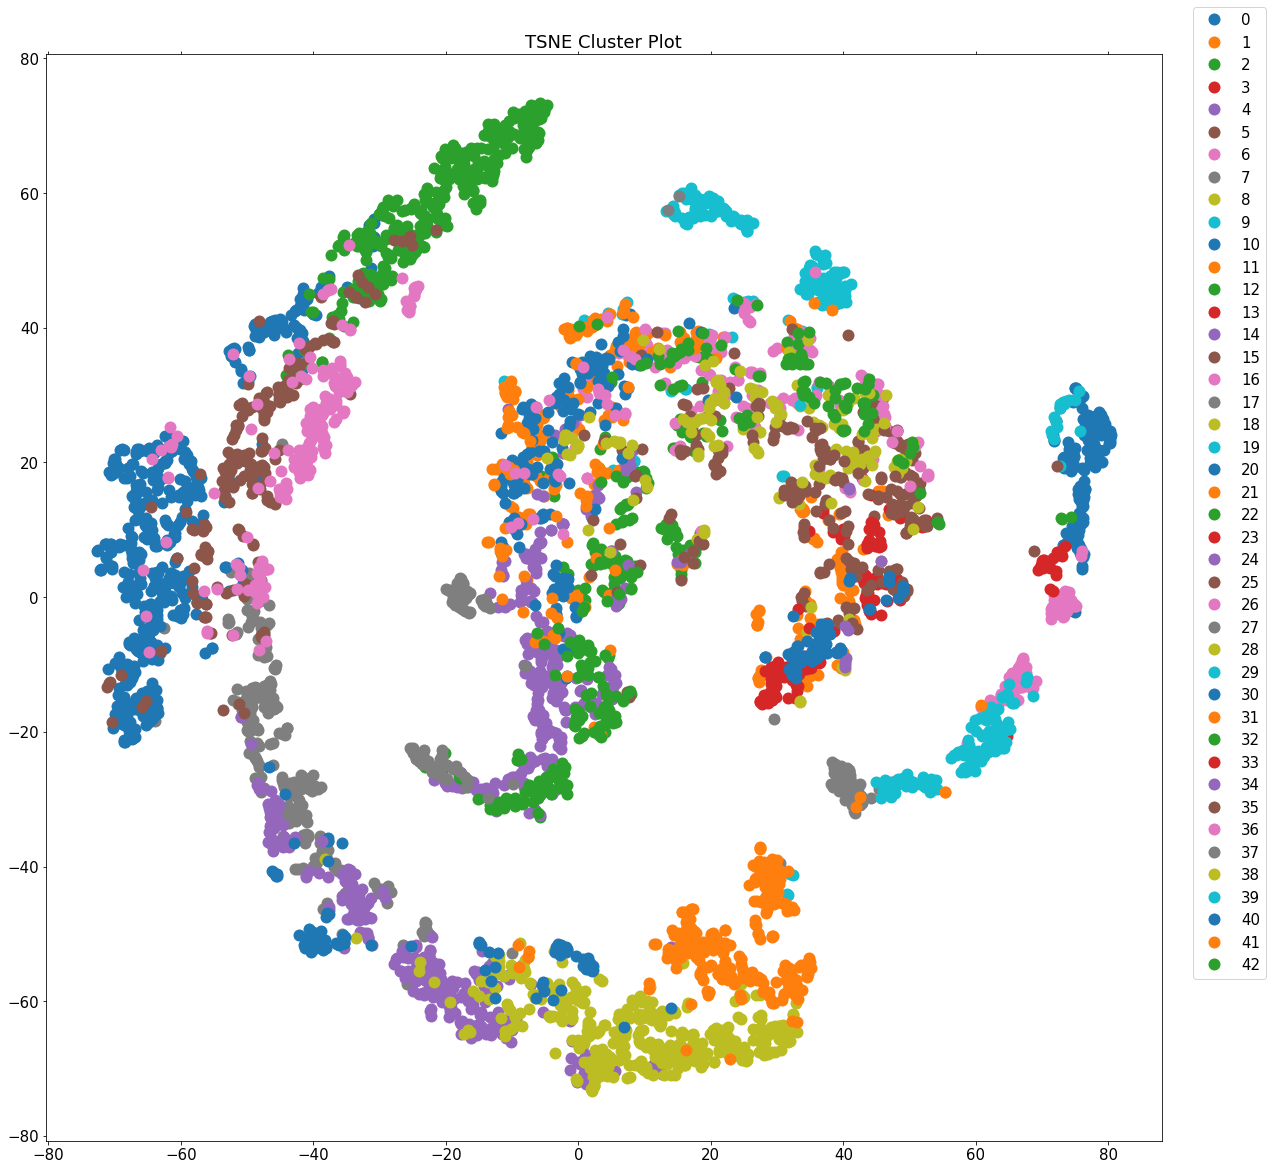

In [22]:
# Project the data onto 2D graph - 10 clusters
dist = 1 - cosine_similarity(mfcc_clips)
mds = TSNE(n_components=2, random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

cluster_plot(pos, 'TSNE Cluster Plot', without_labels=True, savepath='Clusters_GY01/tsne.png')

# Cluster Interpretation

In [23]:
# Prints: (Cluster number, count of clips in cluster)
Counter(clusters).most_common()

[(10, 500),
 (28, 366),
 (12, 328),
 (24, 268),
 (7, 241),
 (35, 194),
 (20, 187),
 (36, 179),
 (0, 151),
 (31, 151),
 (4, 140),
 (22, 139),
 (5, 138),
 (14, 135),
 (11, 134),
 (2, 124),
 (6, 115),
 (9, 106),
 (30, 98),
 (41, 90),
 (21, 88),
 (16, 86),
 (1, 83),
 (19, 79),
 (38, 76),
 (39, 69),
 (25, 67),
 (8, 63),
 (26, 60),
 (42, 59),
 (17, 58),
 (29, 57),
 (3, 56),
 (40, 53),
 (13, 51),
 (27, 50),
 (32, 46),
 (37, 45),
 (15, 43),
 (33, 25),
 (23, 17),
 (18, 10),
 (34, 9)]

In [24]:
play_random_clip_in_cluster(6, clusters) # Play random clip in a cluster

Playing clip index 498 


In [93]:
sd.stop() # Stop playing

In [318]:
# Can assign a label to each cluster here
#cluster_names = ['quiet', 'loud', 'quiet', 'rain', 'birds', 'crickets', 'birds', 'quiet', 'quiet', 'loud']

Playing clip index 448 


In [178]:
# See clip indexes of all clips inside cluster
clip_indexes = get_clip_indexes(0, clusters)
print(clip_indexes)

[36, 37, 40, 41]


In [ ]:
play_clip(36) 

In [48]:
"""
# Save all clusters
dirname = 'Clusters_GY01/'

for i in range(len(np.unique(clusters))):
    os.mkdir(dirname + 'cluster_%d' % i)
    for j in get_clip_indexes(i, clusters):
        save_clip(dirname + 'cluster_%d/%d' % (i, j), shorter_clips[j]) 
"""

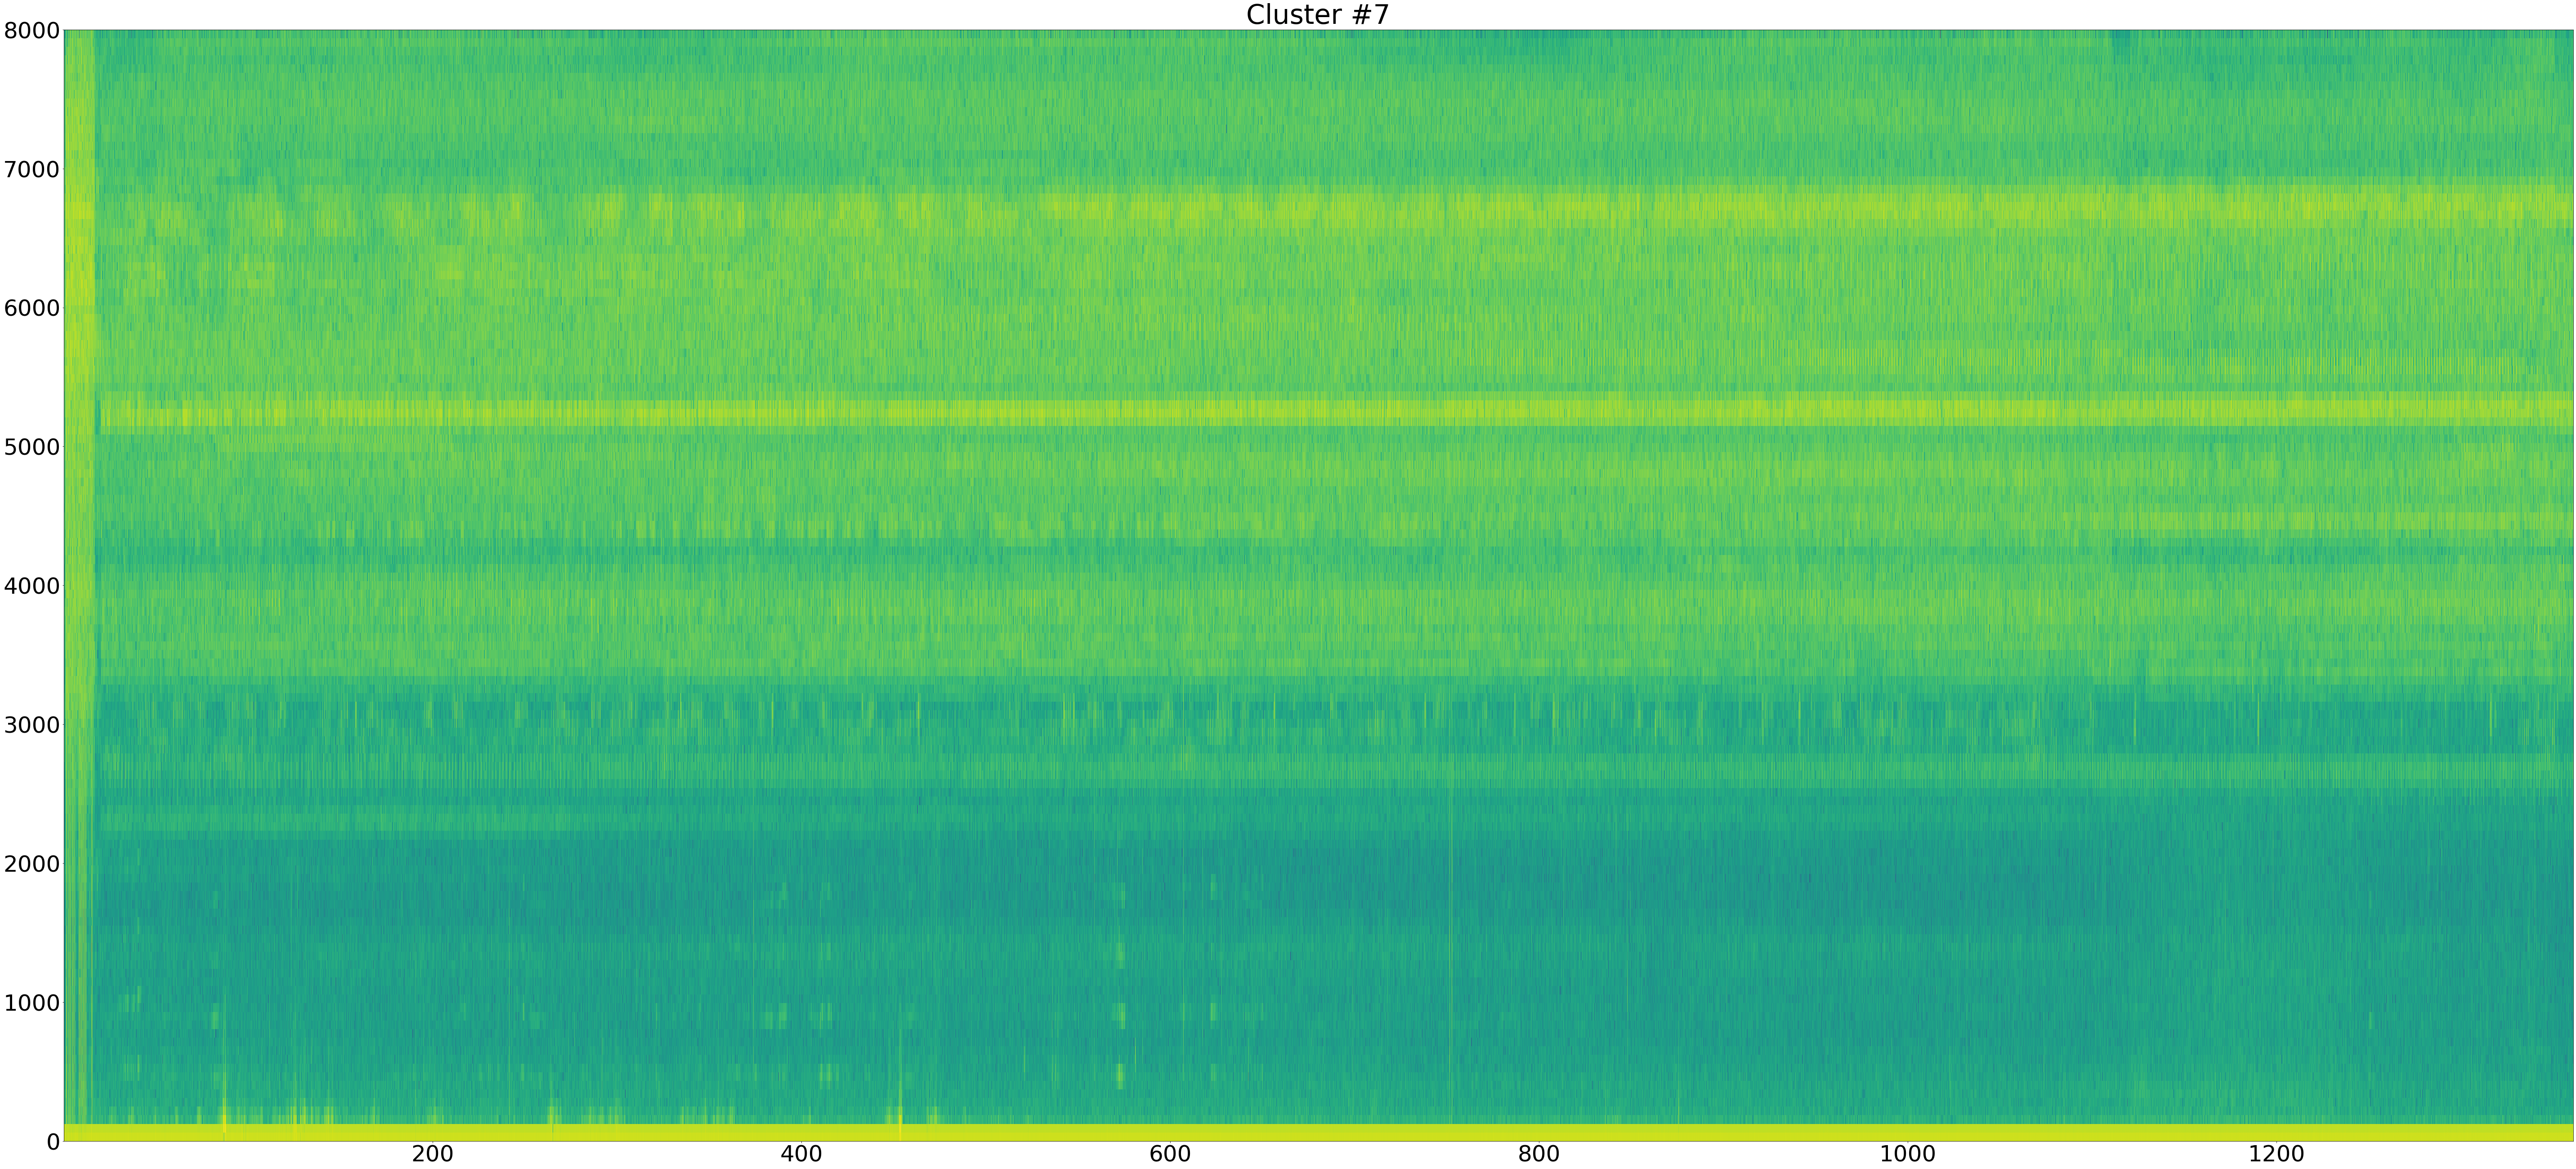

In [133]:
# Plot spectrogram of all clips in a cluster appended together
plot_spectrogram_of_cluster(samplerate, shorter_clips, 7, clusters, separate_channels=False)

# Visualization

In [320]:
num_clips = len(shorter_clips)
num_minutes = num_clips / 6
num_hours = num_minutes / 60

def clip_i_to_bin_i(clip_i):
    return int(clip_i / (num_clips/num_minutes))

def time_hist_for_cluster(cluster_i, clusters):
    hist_data = []
    for index in get_clip_indexes(cluster_i, clusters):
        index = clip_i_to_bin_i(index)
        hist_data.append(index)

    plt.ylim(0, (num_clips/num_minutes))
    plt.title('Cluster: %d (%s)' % (cluster_i, cluster_names[cluster_i]))
    plt.hist(hist_data, bins=int(num_minutes), range=[0, num_minutes])
    plt.show()
    
def colors(n):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append((r,g,b)) 
    return ret

def get_clusters_by_cluster_names(clusters, cluster_names):
    uniq_names = np.unique(cluster_names)
    print(uniq_names)
    new_clusters = [-1] * len(clusters)
    for uniq_name_i, uniq_name in enumerate(uniq_names):
        for name_i, name in enumerate(cluster_names):
            if name == uniq_name:
                # Assign name_i to each index in the cluster that has the same index
                for index in range(len(clusters)):
                    if clusters[index] == name_i:
                        new_clusters[index] = uniq_name_i
    return new_clusters

In [327]:
named_clusters = get_clusters_by_cluster_names(clusters, cluster_names)
Counter(named_clusters).most_common() 
cluster_names_to_plot = np.unique(cluster_names)

# Colors for visualization
jet = pl.get_cmap('jet', len(cluster_names_to_plot))
cluster_colors = {}
for i, name in enumerate(cluster_names_to_plot):
    cluster_colors[name] = jet(i)

['birds' 'crickets' 'loud' 'quiet' 'rain']


Note: These are not real labels for the clusters, this is just a demonstration of the code. The histogram visualization will be replaced with better visualizations for cluster/time data such as Rose Plots.

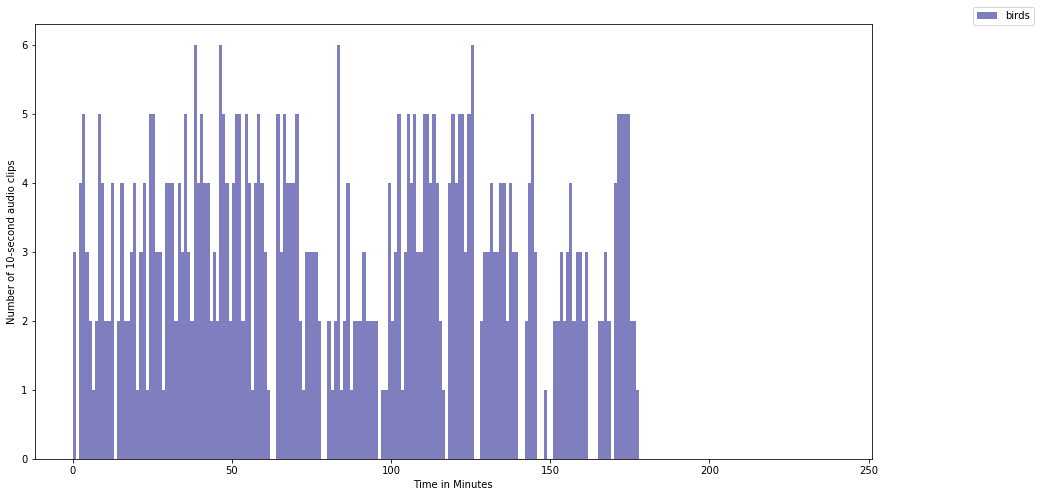

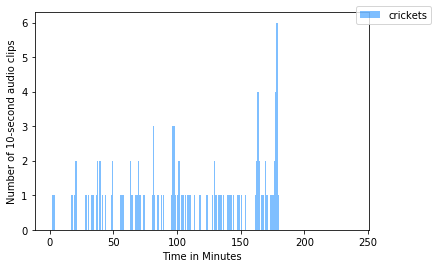

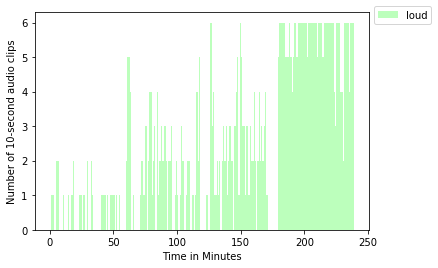

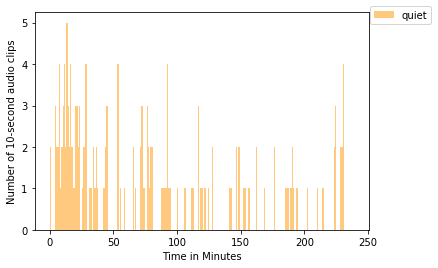

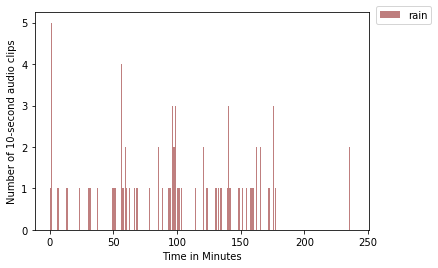

In [324]:
def plot_all_histograms(clusters, cluster_names):
    plt.figure(figsize=(15,8))

    for cluster_i in range(len(cluster_names)):
        hist_data = []
        for index in get_clip_indexes(cluster_i, clusters):
            index = clip_i_to_bin_i(index)
            hist_data.append(index)

        cluster_name = cluster_names[cluster_i]
        c = cluster_colors[cluster_name]
        plt.hist(hist_data, bins=int(num_minutes), range=[0, num_minutes], alpha=0.5, color=c, label=cluster_name)

        plt.ylabel('Number of 10-second audio clips')
        plt.xlabel('Time in Minutes')
        plt.legend(bbox_to_anchor=(1.2, 1.05))
        plt.show()
    
clusters_to_plot = named_clusters
cluster_names_to_plot = np.unique(cluster_names)
plot_all_histograms(named_clusters, np.unique(cluster_names))

In [ ]:
# my code:
#     if wav_list == []:
#         wav_list = [wav_data] 
#     elif sampling_list == []: 
#         sampling_list = sampling_rate
#     else: 
#         wav_list = np.append(wav_data) 
#         sampling_list = np.append(sampling_rate)